In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [37]:
# df = pd.read_csv('datasets/pokemon.csv', index_col=0)
df = pd.read_csv('pokemon.csv', index_col=0, engine='python')
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [38]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


### Let's create a basic Seaborn scatterplot to take a look into the distribution of ATK-DEF stats across our Pokémon!

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:340: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  ax.set_ylim(0, auto=None)


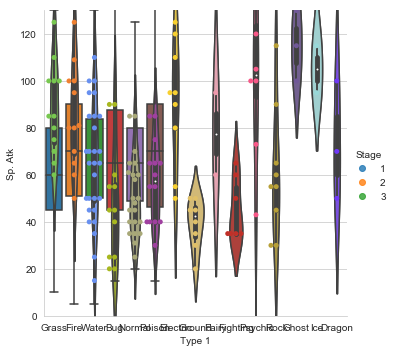

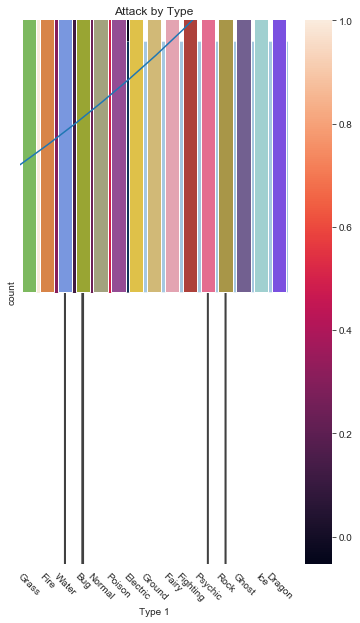

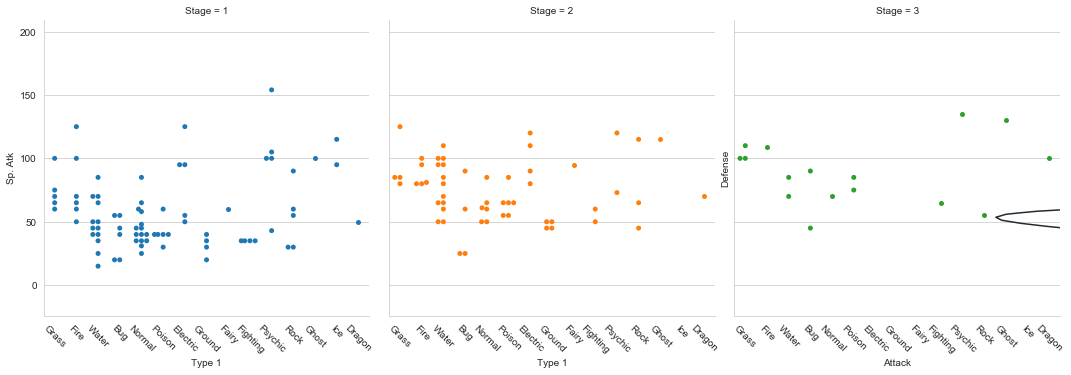

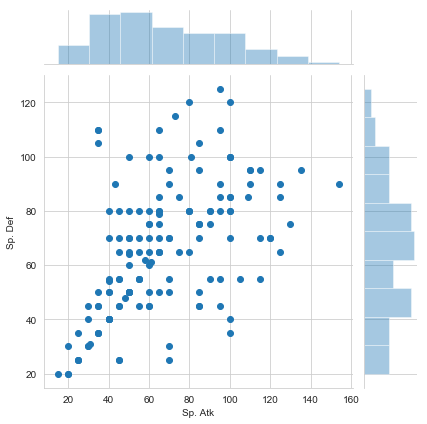

In [53]:
# Improved Scatterplot Tutorial
sns.lmplot(x="Sp. Atk", y="Sp. Def", data=df, fit_reg=False, hue='Stage')

# MatPlotLib Customization
plt.ylim(0, None)
plt.xlim(0, None)

# Creating a Cool Box Plot
stats_df = df.drop(["Total", "Stage", "Legendary"], axis=1)
sns.boxplot(data=stats_df)

# Creating a Neat Violin Plot
sns.set_style("whitegrid")
sns.violinplot(x="Type 1", y="Sp. Atk", data=df)

# Tuning our color palette for the data
pokemon_palette = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.violinplot(x="Type 1", y="Sp. Atk", data=df, palette=pokemon_palette)

# Creating a Swarm Plot
sns.swarmplot(x="Type 1", y="Sp. Atk", data=df, palette=pokemon_palette)

# Creating an Overlayed Violin-Swarm Plot
plt.figure(figsize=(6,10))
sns.violinplot(x="Type 1",
               y="Sp. Atk", 
               data=df, 
               inner=None,
               palette=pokemon_palette)
sns.swarmplot(x="Type 1", 
              y="Sp. Atk", 
              data=df, 
              color='k', 
              alpha=0.7) 
plt.title("Attack by Type")

# Creating a correlation heatmap of stats
corr = stats_df.corr()
sns.heatmap(corr)

# Creating a histogram
sns.distplot(df.Attack)

# Creating a Bar Plot
sns.countplot(x="Type 1", data=df, palette=pokemon_palette)
plt.xticks(rotation=-45)

# Creating a Factor Plot
viz = sns.catplot(x="Type 1", 
                   y="Sp. Atk", 
                   data=df, 
                   hue="Stage",
                   col="Stage",
                   kind="swarm")
viz.set_xticklabels(rotation=-45)

# Creating a Density Plot
sns.kdeplot(df.Attack, df.Defense)

# Creating a Joint Distribution Plot
sns.jointplot(x="Sp. Atk", y="Sp. Def", data=df)